In [1]:
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import folium
import pickle

%matplotlib inline

In [28]:
api_key_census = keys_dict_2['census']
api_key_census

'7739cf8b53a610f138cc94f26c7421ce61fc50e4'

In [55]:
endpoint = 'https://api.census.gov/data/2019/acs/acs1?get=B03002,group(B01001)&for=us:1&key=7739cf8b53a610f138cc94f26c7421ce61fc50e4'

In [56]:
params = {'name': 'B02001',
          'key': api_key_census}

In [57]:
response = requests.get(endpoint)

In [58]:
response

<Response [400]>

# This is not working.

Add a `.` and press tab to see what possible methods you can perform on `response`. Choose one that seems like it would be useful to pull out the information you're looking for. After some experimentation, put your best option in the cell below and save the output to `res`

In [11]:
res = response.json()

In [12]:
res

{'828': {'First_UTC': '2021-03-26T00:49:39Z',
  'Last_UTC': '2021-03-27T00:08:45Z',
  'Month_ordinal': 12,
  'Northern_season': 'late winter',
  'PRE': {'av': 730.123, 'ct': 125793, 'mn': 713.4341, 'mx': 744.6319},
  'Season': 'winter',
  'Southern_season': 'late summer',
  'WD': {'most_common': None}},
 '832': {'First_UTC': '2021-03-30T02:07:35Z',
  'Last_UTC': '2021-03-30T19:29:10Z',
  'Month_ordinal': 12,
  'Northern_season': 'late winter',
  'PRE': {'av': 734.259, 'ct': 62504, 'mn': 714.5854, 'mx': 748.775},
  'Season': 'winter',
  'Southern_season': 'late summer',
  'WD': {'most_common': None}},
 'sol_keys': ['828', '832'],
 'validity_checks': {'826': {'PRE': {'sol_hours_with_data': [0, 1, 2],
    'valid': False}},
  '828': {'PRE': {'sol_hours_with_data': [1,
     2,
     3,
     4,
     5,
     6,
     7,
     8,
     9,
     10,
     11,
     12,
     13,
     14,
     15,
     16,
     17,
     18,
     19,
     20,
     21,
     22,
     23],
    'valid': True}},
  '829': {'PR

Based on some other outputs, the fields represent tempreture (AT), winds (HWS), pressure (PRE), as well as more detailed information about winds. The documentation also indicates that we will get data for the last 7 Sols on Mars. We will use this information to pull out the average temperature for each of the 7 days and visualize the change over time.

In [13]:
pressures = []
for day_num, day_info in res.items():
    try:
        pressures.append(day_info['PRE']['av'])
    except (TypeError, KeyError):
        print(day_num)

sol_keys
validity_checks


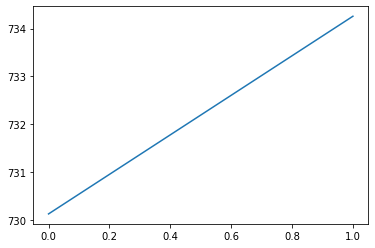

In [14]:
plt.plot(pressures);

---

Let's try another `endpoint` from NASA. This time copy the endpoint from the **Earth** section

In [15]:
endpoint = 'https://api.nasa.gov/planetary/earth/imagery'

Add the appropriate parameters (Use the city center of Nashville as a starting point: (36.186836, -86.7253295)). Be sure to look at which parameters have defaults and which do not (those are required parameters)

In [25]:
# can change the dim to zoom in or out
params = {'lat': 36.2572461, 'lon': -86.7090406, 'dim': .5, 'api_key': api_key_nasa}

In [26]:
response = requests.get(endpoint, params = params)

We'll now use the `.content` attribute from the response to render an image

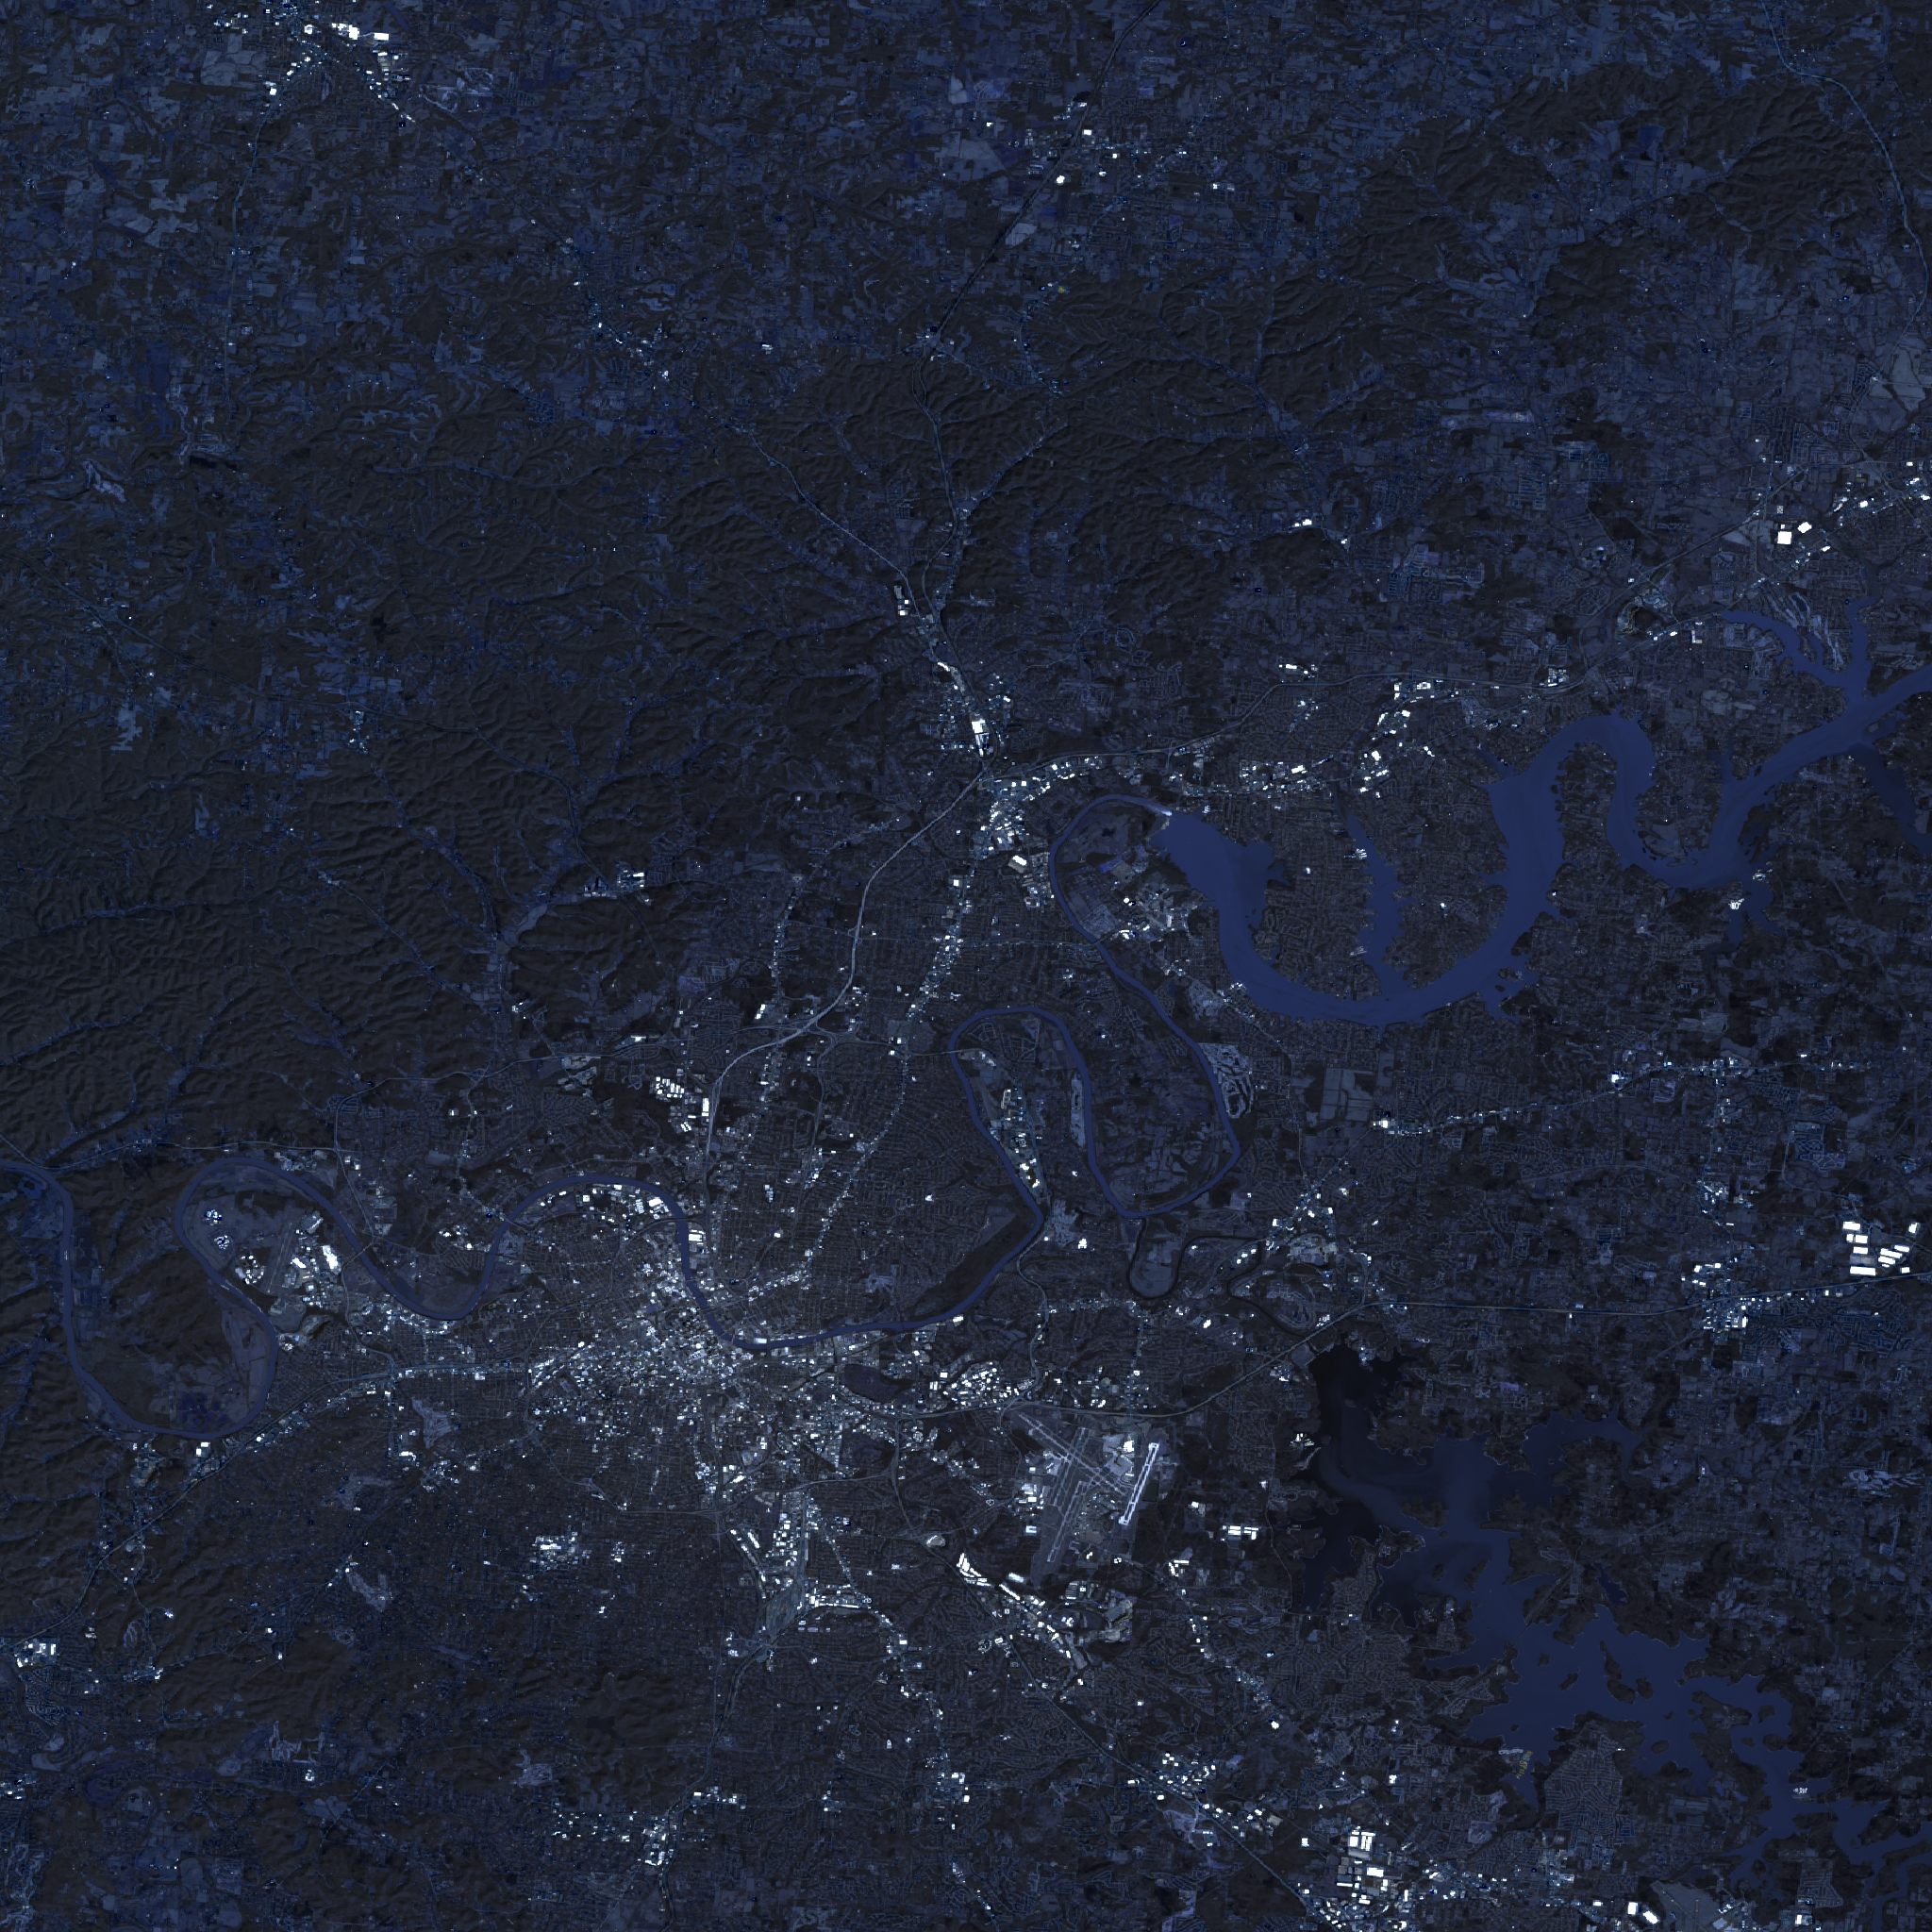

In [27]:
Image(response.content)

---

For the last example we'll switch to using one of the APIs from Google Maps, the `nearbysearch`

For now just follow along, but if you want to test this out in the future, you can follow these steps to get your API key (https://developers.google.com/maps/documentation/embed/get-api-key):
1. Create an account on the Google Cloud Platform Console: console.cloud.google.com
2. Create a new project
3. Select the newly created project, open the drop down menu on the left, and select APIs & Services > Credentials
4. Click Create credentials > API key
5. Your new API key will appear in the text box, copy it to a safe place
6. Click Close

In [90]:
def find_nearby_places(api_key,
                      location,
                      radius,
                      base = 'https://maps.googleapis.com/maps/api/place/nearbysearch/',
                      response_type = 'json',
                      **kwargs):
    '''
    Constructs endpoint and params dict, makes request, and returns output as json
    
    api_key: requred, str, API key from google cloud console
    location: required, str, central location for near by search, format: "<lat>, <lng>"
    radius: required, str, radius of circle (in meters) to search for nearby locations
    base: not required, str, URL base for API request
    resoponse_type: not required, format of response
    **kwargs: not required, search criteria for near by locations
    '''
    endpoint = base+response_type
    kwargs['key'] = api_key
    kwargs['location'] = location
    kwargs['radius'] = radius
    print(kwargs)
    res = requests.get(endpoint, kwargs)
    return res.json()

In [ ]:
response = find_nearby_places()

In [ ]:
response

In [ ]:
nash_map = folium.Map([36.1612, -86.7775], zoom_start = 12)

for store in response['results']:
    lat_lng = store['geometry']['location']
    location = [lat_lng['lat'], lat_lng['lng']]
    popup = store['name']
    folium.Marker(location = location, popup = popup).add_to(nash_map)

nash_map